In [1]:
from matplotlib import rcParams
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from datetime import date
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

today = date.today()
sns.set(style="white", palette="pastel",font_scale=1.5, rc={"lines.linewidth": 2.5})

In [2]:
df = pd.read_csv("brd_covid_19.csv", parse_dates=[7])

In [3]:
df = df.sort_values(["bundesland", "datum"])

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df = df.reset_index().drop("index",axis = 1)

# Feature Engineering

In [6]:
(df.datum.iloc[4]-df.datum.iloc[3]).days

1

## New Cases

In [7]:
new_cases = [(df.faelle.iloc[i] - df.faelle.iloc[i-1])/(df.datum.iloc[i]-df.datum.iloc[i-1]).days if df.faelle.iloc[i] - df.faelle.iloc[i-1]>= 0
             else 0 for i in range (len(df))]

In [8]:
df["neue_faelle"] = new_cases


In [9]:
df.head()

bundesland  faelle  tod  neue_faelle  faelle_per_capita   lat  long  \
0  Baden-Württemberg      10    0          0.0                0.1  48.5   9.0   
1  Baden-Württemberg      14    0          4.0                0.1  48.5   9.0   
2  Baden-Württemberg      15    0          1.0                0.1  48.5   9.0   
3  Baden-Württemberg      19    0          4.0                0.2  48.5   9.0   
4  Baden-Württemberg      26    0          7.0                0.2  48.5   9.0   

       datum  
0 2020-02-28  
1 2020-02-29  
2 2020-03-01  
3 2020-03-02  
4 2020-03-03

## per capita

In [10]:
pop={"Baden-Württemberg":11050.7, "Bayern":13038.7, "Berlin":3624.9, "Brandenburg":2560.6, "Bremen":680.6, "Hamburg":1834.2, 
     "Hessen":6250.5, "Mecklenburg-Vorpommern":1609.6, "Niedersachsen":7978.9, "Nordrhein-Westfalen":17914.3,"Rheinland-Pfalz":4078.1, 
     "Saarland":992.2, "Sachsen":4075.3, "Sachsen-Anhalt":2213.9, "Schleswig-Holstein":2893, "Thüringen":2145.5, "Gesamt":82887}


In [11]:
pop2 = [round((df.iloc[idx,1]/pop[elm])*100,1) for idx, elm in enumerate(df.bundesland.values)]
pop3 = [round((df.iloc[idx,2]/pop[elm])*100,1) for idx, elm in enumerate(df.bundesland.values)]

In [12]:
df["faelle_per_capita"] = pop2
df["tod_per_capita"] = pop3

## BIP

## Sterberate

In [13]:
rate = [((df.iloc[idx,2]/df.iloc[idx,1])*100) for idx, elm in enumerate(df.bundesland.values)]

In [14]:
df["rate"] = rate

## neue Bundesländer

In [15]:
nbl=["Brandenburg","Mecklenburg-Vorpommern", "Sachsen", "Sachsen-Anhalt", "Thüringen"]

In [16]:
nbl2 = [1 if elm in nbl else 0 for elm in df.bundesland.values]

In [17]:
df["neue_bundeslaender"] = nbl2

## Mobility Data from Google

In [18]:
df.head()

bundesland  faelle  tod  neue_faelle  faelle_per_capita   lat  long  \
0  Baden-Württemberg      10    0          0.0                0.1  48.5   9.0   
1  Baden-Württemberg      14    0          4.0                0.1  48.5   9.0   
2  Baden-Württemberg      15    0          1.0                0.1  48.5   9.0   
3  Baden-Württemberg      19    0          4.0                0.2  48.5   9.0   
4  Baden-Württemberg      26    0          7.0                0.2  48.5   9.0   

       datum  tod_per_capita  rate  neue_bundeslaender  
0 2020-02-28             0.0   0.0                   0  
1 2020-02-29             0.0   0.0                   0  
2 2020-03-01             0.0   0.0                   0  
3 2020-03-02             0.0   0.0                   0  
4 2020-03-03             0.0   0.0                   0

In [19]:
df_mob = pd.read_table("tsv/2020-03-29_DE_Mobility_Report_en.pdf.tsv")

In [20]:
df_mob.drop("Region", axis=1)

Category  2020-02-16  2020-02-17  2020-02-18  2020-02-19  \
0    Retail & recreation        22.0        17.0        17.5        19.0   
1     Grocery & pharmacy        25.5        17.5        17.5        16.0   
2                  Parks        26.0        24.0        26.0        22.5   
3       Transit stations        22.0        17.0        16.5        15.0   
4              Workplace        14.0        13.0        14.0        13.5   
..                   ...         ...         ...         ...         ...   
97    Grocery & pharmacy        11.0         1.5         0.0        -2.0   
98                 Parks         4.0         5.5        10.5         4.0   
99      Transit stations         9.0         3.0         2.0        -0.5   
100            Workplace        -1.5        -0.5        -1.5        -2.0   
101          Residential        -1.0         0.5         0.5         0.0   

     2020-02-20  2020-02-21  2020-02-22  2020-02-23  2020-02-24  ...  \
0          18.0        17.0        14.0        15.0        17.0  ...   
1          14.5        17.0        15.0        26.5        10.5  ...   
2          31.0        33.5        39.5        -7.0        34.0  ...   
3          19.0        14.5        25.0        17.5         9.0  ...   
4          10.0         6.0        12.0        10.5        -7.5  ...   
..          ...         ...         ...         ...         ...  ...   
97         -1.0         0.0         0.0        -1.0        -2.0  ...   
98          2.5        10.0        14.0       -22.0         2.0  ...   
99          0.0         1.0         6.5        -2.0        -1.0  ...   
100        -2.0        -2.0         0.0        -3.0        -4.0  ...   
101         0.0         0.0        -1.0         0.0         1.0  ...   

     2020-03-20  2020-03-21  2020-03-22  2020-03-23  2020-03-24  2020-03-25  \
0         -45.0       -64.0       -70.0       -55.5       -55.5       -55.0   
1          12.5       -10.0       -25.5        -6.5        -6.0        -6.0   
2           1.0       -19.0        13.0         9.5        24.0        28.0   
3         -45.0       -53.5       -53.5       -51.5       -51.5       -51.5   
4         -27.5       -22.0       -25.0       -32.5       -35.0       -36.0   
..          ...         ...         ...         ...         ...         ...   
97         -8.0       -20.5       -22.0       -18.0       -20.0       -19.5   
98        -16.0       -30.0         7.5         3.0        15.5        18.0   
99        -44.0       -50.0       -46.0       -46.0       -46.0       -45.5   
100       -30.0       -26.5       -26.0       -34.0       -36.0       -37.0   
101        12.0        10.0         6.0        13.0        14.0        13.5   

     2020-03-26  2020-03-27  2020-03-28  2020-03-29  
0         -55.5       -55.0       -62.5       -75.5  
1          -4.0        -2.0        -9.0       -40.5  
2          20.0        36.0        52.0       -32.0  
3         -52.0       -51.5       -49.0       -62.5  
4         -37.0       -37.0       -27.0       -30.0  
..          ...         ...         ...         ...  
97        -19.0       -19.0       -20.5       -41.5  
98          8.0        24.0        36.5       -38.0  
99        -47.0       -47.0       -40.5       -58.5  
100       -37.5       -38.0       -27.0       -31.5  
101        14.0        14.5         8.5         7.0  

[102 rows x 44 columns]

In [21]:
df_mob2 = pd.DataFrame(df_mob.pivot_table(columns=["Region"], index="Category")).T.reset_index()

In [22]:
df_mob2

Category     level_0              Region  Grocery & pharmacy  Parks  \
0         2020-02-16   Baden—Wﬂrttemberg                30.0   45.5   
1         2020-02-16              Bavaﬂa                23.0   26.5   
2         2020-02-16              Berlin                 2.0    0.5   
3         2020-02-16         Brandenburg                 0.0  -10.0   
4         2020-02-16              Bremen               -15.0    7.5   
..               ...                 ...                 ...    ...   
726       2020-03-29            Saarland               -53.5  -19.5   
727       2020-03-29              Saxony               -47.5  -37.0   
728       2020-03-29       Saxony—Anhalt               -45.0  -43.5   
729       2020-03-29  Schleswig—Holstein               -49.0  -19.0   
730       2020-03-29           Thuringia               -41.5  -38.0   

Category  Residential  Retail & recreation  Transit stations  Workplace  
0                -1.5                 18.5              16.0        0.0  
1                -1.5                 11.0               9.5        0.0  
2                 0.0                  1.0               1.0       -2.0  
3                 0.0                  2.0               0.0       -1.0  
4                 0.0                -11.5              -7.5       -2.5  
..                ...                  ...               ...        ...  
726               9.5                -76.0             -69.5      -39.0  
727               9.0                -76.5             -63.5      -33.0  
728               7.0                -72.5             -62.5      -26.5  
729               9.0                -68.5             -55.0      -35.0  
730               7.0                -72.5             -58.5      -31.5  

[731 rows x 8 columns]

In [23]:
a = list(pop.keys())
my_order=[1,2,3,4,5,6,7,9,8,10,11,12,13,14,15,16,0]
b = [list(df_mob.Region.unique())[i] for i in my_order]
c = {b:a for a, b in zip(a,b)}
d = [c[i] for i in df_mob2.Region]

In [24]:
df_mob2.Region = d

In [25]:
df_mob2.columns = ["datum","bundesland","drogerie_und_supermarkt","park","wohnort","gewerbe_und_freizeit","bus_und_bahn_stationen","arbeitsplatz"]

In [26]:
df_mob2.datum=pd.to_datetime(df_mob2.datum)

In [27]:
df = df.merge(df_mob2,how="left",on=["bundesland","datum"])

# Visualization

In [28]:
dfnew = df[df["bundesland"] != "Gesamt"]

In [29]:
df["datum"].min()

Timestamp('2020-02-28 00:00:00')

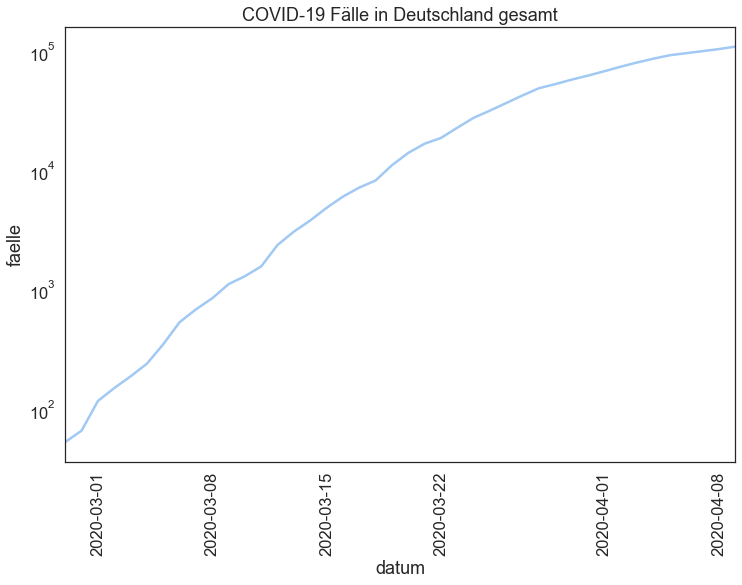

In [48]:
plt.figure(figsize=(12,8))
sns.lineplot(x="datum", y="faelle", data=df[df["bundesland"] == "Gesamt"], palette = sns.color_palette("husl", 16))
plt.title("COVID-19 Fälle in Deutschland gesamt")
plt.xlim(df["datum"].min(),df["datum"].max())
#plt.ylim(bottom=0)
plt.yscale(value="log")
plt.xticks(rotation=90);


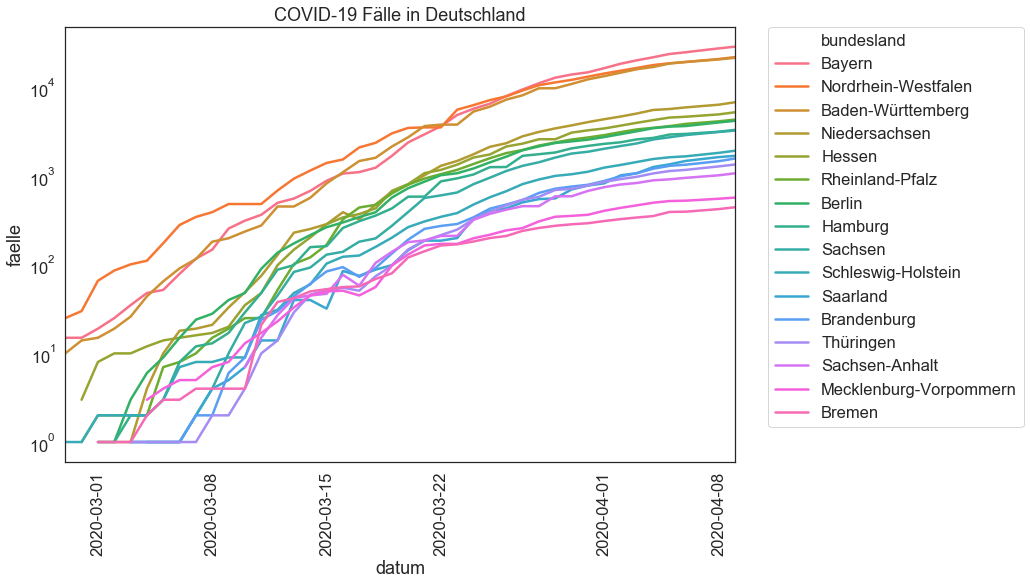

In [31]:
order = list(dfnew.sort_values("faelle", ascending = False).bundesland.unique())

plt.figure(figsize=(12,8))
sns.lineplot(x="datum", y="faelle", data=dfnew, hue="bundesland", palette = sns.color_palette("husl", 16), hue_order=order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True)
plt.title("COVID-19 Fälle in Deutschland")
plt.xlim(df["datum"].min(),df["datum"].max())
#plt.ylim(bottom=0)
plt.yscale("log")
plt.xticks(rotation=90);

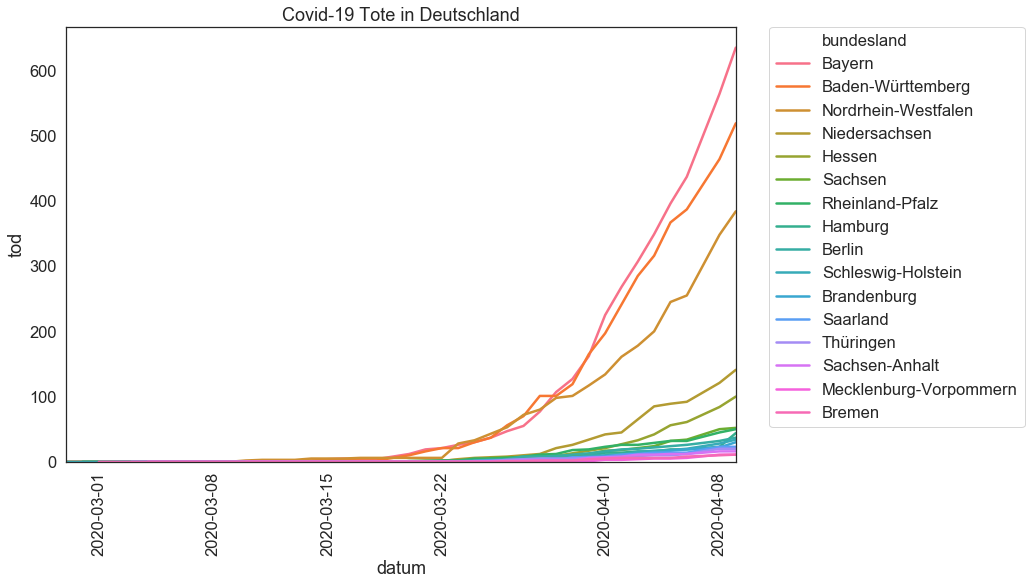

In [32]:
order = list(dfnew.sort_values("tod", ascending = False).bundesland.unique())

plt.figure(figsize=(12,8))
sns.lineplot(x="datum", y="tod", data=dfnew, hue="bundesland", palette = sns.color_palette("husl", 16), hue_order=order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True)
plt.title("Covid-19 Tote in Deutschland")
plt.xlim(df["datum"].min(),df["datum"].max())
plt.ylim(bottom=0)
#plt.yscale("log")
plt.xticks(rotation=90);

In [33]:
dfnew_group = dfnew.groupby("bundesland")
dfnew2 = dfnew_group.max().reset_index()

In [34]:
fig = px.scatter_mapbox(dfnew2, lat="lat", lon="long", 
                        hover_name="bundesland", hover_data=["faelle", "tod"],
                        color_discrete_sequence=["blue"], zoom=4.8, 
                        center={"lat":51.1, "lon":10.3},
                        color_continuous_scale=px.colors.sequential.Jet,
                        height=500, color="tod", size="faelle", size_max=50)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
#fig.write_image("figures/map "+str(today)+".png")

In [35]:
dfnew3 = dfnew.copy()
dfnew3.datum = dfnew3.datum.astype("str")

In [36]:
fig = px.scatter_mapbox(dfnew3.sort_values("datum"), lat="lat", lon="long", 
                        hover_name="bundesland", hover_data=["faelle", "tod","neue_faelle","faelle_per_capita"],
                        color_discrete_sequence=["blue"], zoom=5,
                        animation_frame = "datum",
                        center={"lat":51.1, "lon":10.3},
                        range_color=[0,dfnew3.tod.max()],
                        color_continuous_scale=px.colors.sequential.Jet,
                        height=800, color="tod", size="faelle", size_max=80,
                        title="Corona Fälle in Deutschland")
fig.update_layout(mapbox_style="carto-positron")
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show(config={
    'scrollZoom': True,
    'displayModeBar': True,
    'editable': True
})

In [37]:
fig = px.scatter_mapbox(dfnew3.sort_values("datum"), lat="lat", lon="long", 
                        hover_name="bundesland", hover_data=["faelle", "tod","neue_faelle","faelle_per_capita"],
                        color_discrete_sequence=["blue"], zoom=5,
                        animation_frame = "datum",
                        center={"lat":51.1, "lon":10.3},
                        range_color=[0,dfnew3.tod.max()],
                        color_continuous_scale=px.colors.sequential.Jet,
                        height=800, color="tod", size="faelle_per_capita", size_max=40,
                        title="Corona Fälle pro 100.000 in Deutschland")
fig.update_layout(mapbox_style="carto-positron")
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show(config={
    'scrollZoom': True,
    'displayModeBar': True,
    'editable': True
})

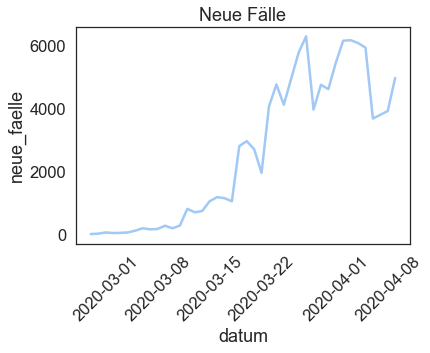

In [38]:
plot = sns.lineplot(data = df[df["bundesland"]=="Gesamt"], x="datum", y="neue_faelle")
#for ind, label in enumerate(plot.get_xticklabels()):
 #   if ind % 5 == 0:  # every 10th label is kept
  #      label.set_visible(True)
   # else:
    #    label.set_visible(False)
plt.title("Neue Fälle")
plt.xticks(rotation=45);

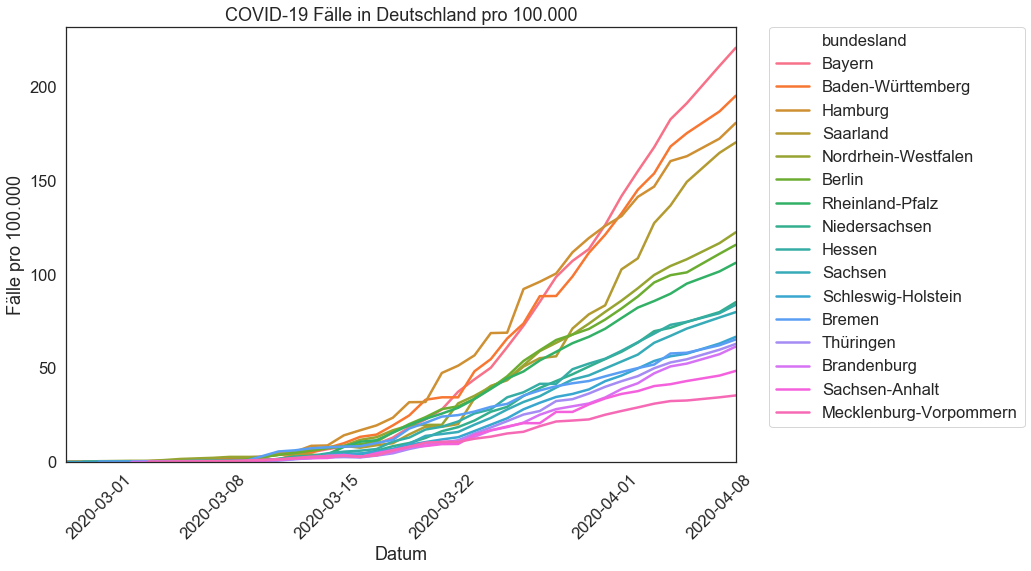

In [39]:
order = list(df[df["bundesland"] != "Gesamt"].sort_values("faelle_per_capita", ascending = False).bundesland.unique())

plt.figure(figsize=(12,8))
sns.lineplot(x="datum", y="faelle_per_capita", data=df[df["bundesland"] != "Gesamt"], 
             hue="bundesland", palette = sns.color_palette("husl", 16), hue_order=order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True)
plt.title("COVID-19 Fälle in Deutschland pro 100.000")
plt.ylabel("Fälle pro 100.000")
plt.xlabel("Datum")
plt.xlim(df["datum"].min(),df["datum"].max())
plt.ylim(bottom=0)
#plt.yscale("log")
plt.xticks(rotation=45);

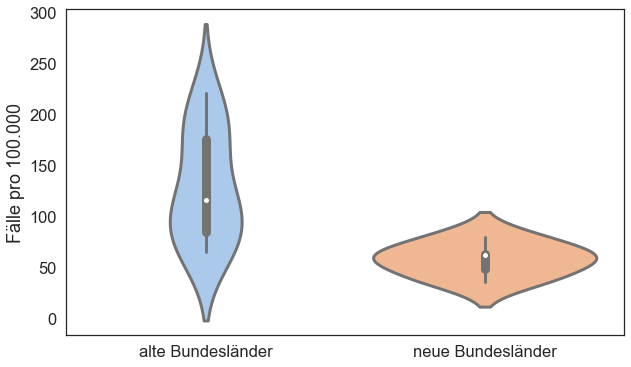

In [40]:
sns.set_style("white")
plt.figure (figsize=(10,6))
sns.violinplot(data = dfnew2 , y="faelle_per_capita", x="neue_bundeslaender",
              linewidth=3)
plt.ylabel("Fälle pro 100.000")
plt.xlabel("")
plt.xticks(np.arange(2),labels=("alte Bundesländer","neue Bundesländer"));

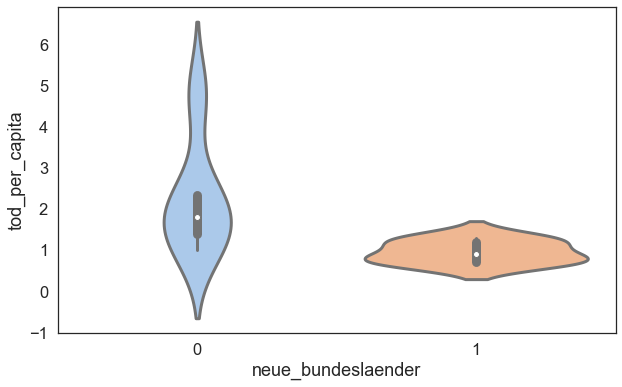

In [41]:
plt.figure (figsize=(10,6))
sns.violinplot(data = dfnew2 , y="tod_per_capita", x="neue_bundeslaender",
              linewidth=3)

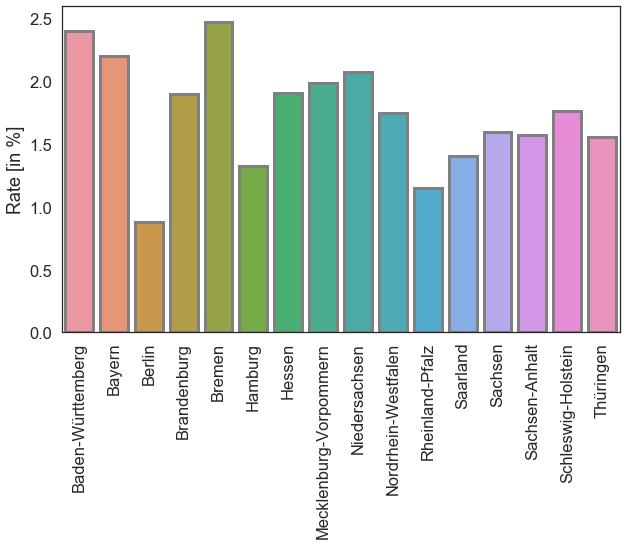

In [42]:
plt.figure (figsize=(10,6))
sns.barplot(data = dfnew2[dfnew2["rate"]!=0] , y="rate", x="bundesland",
            edgecolor="grey", linewidth=3)
plt.ylabel("Rate [in %]")
plt.xticks(rotation=90)
plt.xlabel("");

In [43]:
df.columns

Index(['bundesland', 'faelle', 'tod', 'neue_faelle', 'faelle_per_capita',
       'lat', 'long', 'datum', 'tod_per_capita', 'rate', 'neue_bundeslaender',
       'drogerie_und_supermarkt', 'park', 'wohnort', 'gewerbe_und_freizeit',
       'bus_und_bahn_stationen', 'arbeitsplatz'],
      dtype='object')

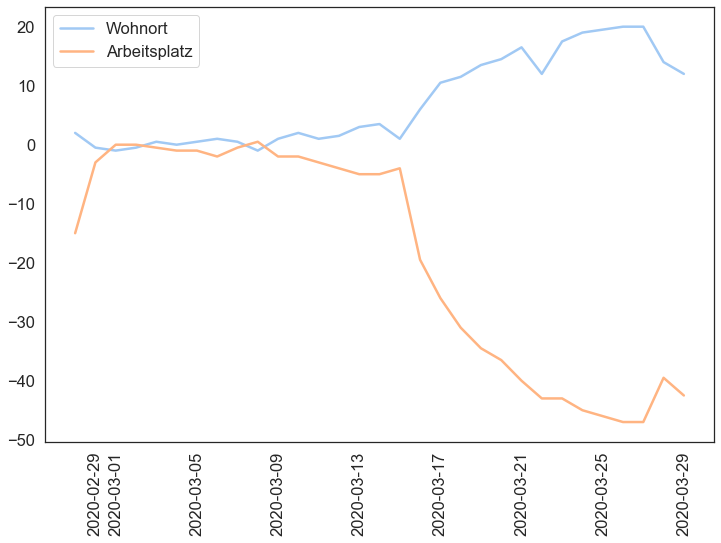

In [47]:
#order = list(dfnew.sort_values("tod", ascending = False).bundesland.unique())
data = df[df.bundesland == "Bayern"]
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.plot(data.datum, data.wohnort)
plt.plot(data.datum, data.arbeitsplatz)
#plt.xlim(data.datum.min())
plt.legend(labels=["Wohnort","Arbeitsplatz"])
#plt.plot(data.tod)

In [45]:
data[data.wohnort != data.datum.isna()]

bundesland  faelle  tod  neue_faelle  faelle_per_capita   lat  long  \
41     Bayern      15    0          0.0                0.1  48.9  11.4   
42     Bayern      15    0          0.0                0.1  48.9  11.4   
43     Bayern      19    0          4.0                0.1  48.9  11.4   
44     Bayern      25    0          6.0                0.2  48.9  11.4   
45     Bayern      35    0         10.0                0.3  48.9  11.4   
47     Bayern      52    0          4.0                0.4  48.9  11.4   
48     Bayern      79    0         27.0                0.6  48.9  11.4   
49     Bayern     117    0         38.0                0.9  48.9  11.4   
50     Bayern     148    0         31.0                1.1  48.9  11.4   
51     Bayern     256    0        108.0                2.0  48.9  11.4   
52     Bayern     314    0         58.0                2.4  48.9  11.4   
53     Bayern     366    0         52.0                2.8  48.9  11.4   
54     Bayern     500    1        134.0                3.8  48.9  11.4   
55     Bayern     558    1         58.0                4.3  48.9  11.4   
56     Bayern     681    1        123.0                5.2  48.9  11.4   
57     Bayern     886    4        205.0                6.8  48.9  11.4   
58     Bayern    1067    5        181.0                8.2  48.9  11.4   
59     Bayern    1109    4         42.0                8.5  48.9  11.4   
60     Bayern    1243    4        134.0                9.5  48.9  11.4   
61     Bayern    1692    8        449.0               13.0  48.9  11.4   
62     Bayern    2401   12        709.0               18.4  48.9  11.4   
63     Bayern    2960   19        559.0               22.7  48.9  11.4   
64     Bayern    3650   21        690.0               28.0  48.9  11.4   
65     Bayern    4892   26       1242.0               37.5  48.9  11.4   
66     Bayern    5754   30        862.0               44.1  48.9  11.4   
67     Bayern    6558   37        804.0               50.3  48.9  11.4   
68     Bayern    7993   47       1435.0               61.3  48.9  11.4   
69     Bayern    9481   55       1488.0               72.7  48.9  11.4   
70     Bayern   11150   77       1669.0               85.5  48.9  11.4   
71     Bayern   12881  107       1731.0               98.8  48.9  11.4   
72     Bayern   13989  127       1108.0              107.3  48.9  11.4   
73     Bayern   14810  162        821.0              113.6  48.9  11.4   
74     Bayern   16497  225       1687.0              126.5  48.9  11.4   
75     Bayern   18496  268       1999.0              141.9  48.9  11.4   
76     Bayern   20237  307       1741.0              155.2  48.9  11.4   
77     Bayern   21908  349       1671.0              168.0  48.9  11.4   
78     Bayern   23846  396       1938.0              182.9  48.9  11.4   
79     Bayern   24974  437       1128.0              191.5  48.9  11.4   
80     Bayern   27564  564       1295.0              211.4  48.9  11.4   
81     Bayern   28827  635       1263.0              221.1  48.9  11.4   

        datum  tod_per_capita      rate  neue_bundeslaender  \
41 2020-02-28             0.0  0.000000                   0   
42 2020-02-29             0.0  0.000000                   0   
43 2020-03-01             0.0  0.000000                   0   
44 2020-03-02             0.0  0.000000                   0   
45 2020-03-03             0.0  0.000000                   0   
47 2020-03-05             0.0  0.000000                   0   
48 2020-03-06             0.0  0.000000                   0   
49 2020-03-07             0.0  0.000000                   0   
50 2020-03-08             0.0  0.000000                   0   
51 2020-03-09             0.0  0.000000                   0   
52 2020-03-10             0.0  0.000000                   0   
53 2020-03-11             0.0  0.000000                   0   
54 2020-03-12             0.0  0.200000                   0   
55 2020-03-13             0.0  0.179211                   0   
56 2020-03-14          